# データ前処理

In [1]:
import codecs
import pandas as pd
import warnings
import numpy as np
import re


from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')
train= pd.read_csv('train+.csv', sep=',',engine='c')

test=pd.read_csv('test+.csv', sep=',',engine='c')
price=pd.read_csv('price.csv', sep=',',engine='python',encoding='shift-jis')
train=train.drop(['Unnamed: 0'],axis=1)
test=test.drop(['Unnamed: 0'],axis=1)
train_tmp = train.copy()
test_tmp = test.copy()
# train_tmp = train_tmp.drop("賃料", axis=1)
df = pd.concat([train_tmp, test_tmp])
df=df.reset_index(drop=True)
df=df.rename(columns={'所在地':'address','アクセス':'access','間取り':'space','面積':'width','放送・通信':'information','築年数':'years','方角':'direction', '所在階':'bfloor','バス・トイレ':'bath','キッチン':'kitchen','室内設備':'service','駐車場':'parking','周辺環境':'enviroment','建物構造':'architect','契約期間':'period','lat':'lat','lng':'lng',"賃料":"value"})
price=price.rename(columns={'緯度':'lat','経度':'lng','市区町村名':'area','住居表示':'address','地積':'width','利用状況表示':'usage','建物構造':'architect','階層（地上）':'height','前面道路区分':'road','前面道路の方位区分':'direction','前面道路の幅員':'width','周辺の土地の利用の現況':'situation','駅名':'station','駅距離':'dis','用途区分':'application',
                            '防火区分':'fire','Ｈ３０価格':'price'})
price.address=price.address.map(lambda x:x.split("　")[1])
price["address0"]=price.address.map(lambda x:x.split("区")[0])
price["address1"]=price.address.map(lambda x:x.split("区")[1])
price["address1"]=price.address1.map(lambda x:re.split("１|２|３|４|５|６|７|８|９|1|2|3|4|5|6|7|8|9|一丁目|二丁目|三丁目|四丁目|五丁目|六丁目|七丁目|八丁目",x)[0])


In [2]:
def srashdelete(x):
    try:
        return x.replace('／','')
    except AttributeError:
        return " "
information=df.information.map(srashdelete)
def filter_info(x):
    try :
        j=''
        for i in x:
            j+=i+' '
        return j
    except AttributeError:
        return " "
    except IndexError:
        return " "
information=information.str.split("\t").map(filter_info)

docs = np.array(information)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

infofeatures = count.get_feature_names()
# print(features)

information=pd.DataFrame(bags.toarray(),columns=infofeatures)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


In [3]:
def filter_dis(x):
    return np.sqrt((x.lat-35.681236)**2.0+(x.lng-139.767125)**2.0)

dis=(df.lat-35.681236)**2+(df.lng-139.767125)**2.0

def filter_conv(x):
    try :
        if "コンビニ" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
conv=df.enviroment.map(filter_conv)

def filter_period(x):
    try :
        if "定期借家" in x:
            return 1
        else :
            return 0
    except TypeError:
        return 0
    

rp=df.period.map(filter_period)

def filter_period2(x):
    try :
        if "定期借家" in x:
            return "定期借家"
        else :
            return x
    except TypeError:
        return x
    
period=df.period.map(filter_period2)
#アクセス時間の前処理
access=df.access.str.split("\t\t",expand=True)

access.columns=['access0','access1','access2','access3']
access

def filter_eki(x):
    try :
        return x.split("\t")[1]
    except AttributeError:
        return " "
    except IndexError:
        return " "
def stationdelete(x):
    try:
        return x.replace("駅"," ")
    except AttributeError:
        return " "
kari0=access.applymap(filter_eki).access0
kari1=access.applymap(filter_eki).access1
kari2=access.applymap(filter_eki).access2
kari3=access.applymap(filter_eki).access3
kari=(kari0+kari1+kari2+kari3).map(stationdelete)

docs = np.array(kari)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

ekifeatures = count.get_feature_names()
# print(features)

nearstation=pd.DataFrame(bags.toarray(),columns=ekifeatures)

def srashdelete(x):
    try:
        return x.replace('／','')
    except AttributeError:
        return " "
se=df.service.map(srashdelete)
def filter_se(x):
    try :
        j=''
        for i in x:
            j+=i+' '
        return j
    except AttributeError:
        return " "
    except IndexError:
        return " "
se=se.str.split("\t").map(filter_se)

docs = np.array(se)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

sefeatures = count.get_feature_names()
# print(features)

se=pd.DataFrame(bags.toarray(),columns=sefeatures)

def filter_ts(x):
    try:
        return int(x.count("\t"))
    except IndexError:
        return 9
    except TypeError:
        return 9
    except AttributeError:
        return 9
sn=df.service.map(filter_ts)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [4]:
df

,id,lat,lng,access,kitchen,bath,enviroment,period,service,architect,address,bfloor,information,direction,years,value,space,width,parking
0,1,35.748456,139.728800,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,RC（鉄筋コンクリート）,東京都北区滝野川３丁目,1階／12階建,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,南東,9年9ヶ月,75000.0,1K,20.01m2,駐輪場\t空有
1,2,35.662885,139.778627,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,ガスコンロ／\tシステムキッチン\t／\t給湯,専用トイレ／\tシャワー／\t温水洗浄便座,【スーパー】 1283m,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,鉄骨造,東京都中央区月島３丁目,5階／10階建,インターネット対応,NaN,44年10ヶ月,76000.0,1R,16.5m2,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2,3,35.675153,139.666255,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,2年間,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,RC（鉄筋コンクリート）,東京都渋谷区笹塚２丁目,12階／15階建,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,南,8年6ヶ月,110000.0,1K,22.05m2,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m"
3,4,35.700170,139.648465,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,ガスコンロ／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,2年間\t※この物件は\t定期借家\tです。,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,RC（鉄筋コンクリート）,東京都杉並区高円寺南２丁目23-2,3階／4階建,インターネット対応／\t光ファイバー,南,29年4ヶ月,150000.0,2LDK,60.48m2,駐車場\t無\t駐輪場\t無\tバイク置き場\t無
4,5,35.766431,139.872321,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,給湯／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,2年間,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,木造,東京都葛飾区金町３丁目7-2,1階／2階建,NaN,南,31年7ヶ月,74000.0,2DK,39.66m2,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62727,62728,35.742059,139.718584,埼京線\t板橋駅\t徒歩3分\t\t都営三田線\t新板橋駅\t徒歩9分\t\t東武東上線\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,【コンビニ】 204m\t【スーパー】 284m\t【スーパー】 496m\t【コンビニ】 ...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,RC（鉄筋コンクリート）,東京都豊島区上池袋４丁目,6階／8階建,インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ／\t...,東,0年1ヶ月,NaN,1K,25.66m2,駐車場\t無\t駐輪場\t無\tバイク置き場\t無
62728,62729,35.693369,139.777349,都営新宿線\t岩本町駅\t徒歩2分\t\t山手線\t秋葉原駅\t徒歩4分\t\t日比谷線\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t独立キッチン,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機,NaN,NaN,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気...,RC（鉄筋コンクリート）,東京都千代田区岩本町２丁目,8階／15階建,インターネット対応／\t高速インターネット／\t光ファイバー／\tCATV／\tCSアンテナ...,南,15年6ヶ月,NaN,1R,22.71m2,"駐車場\t空有\t43,200円\t駐輪場\t空有"
62729,62730,35.728150,139.667420,都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t...,ガスコンロ／\tコンロ3口／\t給湯,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,NaN,2年間\t※この物件は\t定期借家\tです。,エアコン付／\t床暖房\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエ...,RC（鉄筋コンクリート）,東京都中野区江古田３丁目14-3,10階／14階建,インターネット対応／\tCATV／\tインターネット使用料無料,南東,1年0ヶ月,NaN,1LDK,45.76m2,"駐車場\t空有\t32,400円(税込)\t駐輪場\t空有\tバイク置き場\t無"
62730,62731,35.686153,139.736463,有楽町線\t麹町駅\t徒歩3分\t\t丸ノ内線(池袋－荻窪)\t四ツ谷駅\t徒歩4分\t\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,NaN,NaN,冷房／\tエアコン付／\t床暖房\tバルコニー／\tフローリング／\t24時間換気システム\...,SRC（鉄骨鉄筋コンクリート）,東京都千代田区二番町,14階／14階建,インターネット対応／\t高速インターネット／\t光ファイバー／\tCATV／\tCSアンテナ...,北,15年4ヶ月,NaN,1K,55.2m2,駐輪場\t空有


In [5]:
def srashdelete(x):
    try:
        return x.replace('／','')
    except AttributeError:
        return " "
ba=df.bath.map(srashdelete)
def filter_ba(x):
    try :
        j=''
        for i in x:
            j+=i+' '
        return j
    except AttributeError:
        return " "
    except IndexError:
        return " "
ba=ba.str.split("\t").map(filter_ba)

docs = np.array(ba)
count = CountVectorizer()
bags = count.fit_transform(docs)

print(bags.toarray())
# [[1 1 1 0]
#  [0 1 1 1]]

bafeatures = count.get_feature_names()
# print(features)

ba=pd.DataFrame(bags.toarray(),columns=bafeatures)

[[1 0 1 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 1 ... 1 1 0]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 0]]


In [6]:
access=access.applymap(lambda x:x.split("歩") if x is not None else None)
def filter_func1(x):
    try:
        return int(x[1].replace("分",""))
    except IndexError:
        return None
    except TypeError:
        return None
    except ValueError:
        return None
access=access.applymap(filter_func1)

accessmiss=access[access.access0.isnull()].index
access.access0.ix[accessmiss]=[15,1,15,15,7,9,10,11,8,10,13,8,8]
access=access.fillna(method='ffill',axis='columns')
access=access.fillna(method='bfill',axis='columns')
access[access.index==9845]=1
access[access.index==56577]=13

address=df.address
address=address.map(lambda x :x.replace("東京都",""))
address1=address.map(lambda x:x.split("区")[0])
address2=address.map(lambda x:x.split("区")[1])
address2=address2.map(lambda x:re.split("１|２|３|４|５|６|７|８|９|1|2|3|4|5|6|7|8|9|一丁目|二丁目|三丁目|四丁目|五丁目|六丁目|七丁目|八丁目",x)[0] )
df["address2"]=address2

townlist=list(df.groupby("address2").value.mean().sort_values().index)
towndic={}
for i, feat in enumerate(townlist):
    towndic[feat]=i
towndic
ntown=df.address2.map(towndic)
ntown[ntown.isnull()]=280
ntown=834-ntown
ntownlist=list(ntown[ntown.isnull()].index)

#築年数の前処理
years=df.years
years.map(lambda x:str(x.split("年")[0]))
def filter_func2(x):
    kari=x.split("年")[0]
    if kari=="新築":
        return 0
    else :
        return int(kari)
years=years.map(filter_func2)

#間取りの前処理
import re
df["room"]=0
df["R"]=0
df["L"]=0
df["DK"]=0
df["LDK"]=0
df["D"]=0
df["K"]=0
df["S"]=0
df.room=df.space.apply(lambda x: int(re.split("L|D|K|S|R",x)[0]))
df.R=df.space.apply(lambda x: 1 if "R" in x else 0)
df.L=df.space.apply(lambda x: 1 if "L" in x else 0)
df.DK=df.space.apply(lambda x: 1 if "DK" in x else 0)
df.LDK=df.space.apply(lambda x: 1 if "LDK" in x else 0)
df.D=df.space.apply(lambda x: 1 if "D" in x else 0)
df.K=df.space.apply(lambda x: 1 if "K" in x else 0)
df.S=df.space.apply(lambda x: 1 if "S" in x else 0)

room=df.space.apply(lambda x: re.split("L|D|K|S|R",x)[0])
R=df.space.apply(lambda x: 1 if "R" in x else 0)
L=df.space.apply(lambda x: 1 if "L" in x else 0)
DK=df.space.apply(lambda x: 1 if "DK" in x else 0)
LDK=df.space.apply(lambda x: 1 if "LDK" in x else 0)
D=df.space.apply(lambda x: 1 if "D" in x else 0)
K=df.space.apply(lambda x: 1 if "K" in x else 0)
S=df.space.apply(lambda x: 1 if "S" in x else 0)
room=room.apply(lambda x:int(x))

bfloor=df.bfloor
import numpy as np
bfloor1=bfloor.map(lambda x: x.split("／")[0] if type(x) is str else "2階")
def floor_func(x):
    try :
        return x.split("／")[1]
    except IndexError:
        return x.split("／")[0]
    except AttributeError:
        return "2階"
bfloor2=bfloor.map(floor_func)

bfloor1=bfloor1.map(lambda x:x.replace("地下","-"))
bfloor2=bfloor2.map(lambda x:x.replace("地下","-"))
bfloor1=bfloor1.map(lambda x:x.split("階")[0])
bfloor2=bfloor2.map(lambda x:x.split("階")[0])
bfloor = pd.concat([bfloor1, bfloor2], axis=1)

bfloor.columns=["bfloor","height"]
#前処理
bfloor.bfloor[bfloor.bfloor==""]=None
bfloor=bfloor.fillna(method='ffill',axis='columns')
bfloor=bfloor.fillna(method='bfill',axis='columns')
bfloor=bfloor.applymap(lambda x:int(x))
bfloor1=bfloor.bfloor
bfloor2=bfloor.height
bfloor3=bfloor2-bfloor1

#面積の前処理
width=df.width
width=width.map(lambda x:float(x.replace("m2","")))

architect=df.architect
architect=architect.map(lambda x: 0 if "木造" in x else 1)

direction=df.direction
direction=direction.fillna(method='ffill')
# direction=direction.map(lambda x:1if "南" in x else 0)

def filter_pa(x):
    try:
        if '空有' in x:
            return 1
        else:
            return 0
    except TypeError:
        return 0
#前処理

pa=df.parking.map(filter_pa)

new=df.years.map(lambda x :1if x=="新築" else 0)
one=bfloor1.map(lambda x:1 if x==1 else 0)
bid=df.id
lat=df.lat
lng=df.lng

In [7]:
block={"ブロック":1,"その他":4,"鉄骨造":7,"木造":8,"ALC（軽量気泡コンクリート）":5,"RC（鉄筋コンクリート）":10,"HPC（プレキャスト・コンクリート（重量鉄骨））":2,"PC（プレキャスト・コンクリート（鉄筋コンクリート））":3,"鉄筋ブロック":0,"軽量鉄骨":6,"SRC（鉄骨鉄筋コンクリート）":9}
architect=df.architect.map(block)
dis=(lat-35.651816)**2+(lng-139.741531)**2
dis=(dis)*1000+1
access.access0=access.access0.max()-access.access0
landprice=address2.map(price.groupby("address1").mean().price.map(int))
dropland=landprice[landprice.isnull()].index
# landprice.ix[dropland]
landprice.ix[dropland]=address1.ix[dropland].map(price.groupby("address0").mean().price.map(int))
landprice=landprice*width
stalist=list(pd.concat([df,kari0],axis=1).groupby("access0").mean().value.sort_values().index)
stadic={}
for i,station in enumerate(stalist):
    stadic[station]=i
stan=kari0.map(stadic)
elavator=se["エレベーター"]

In [8]:
# df.ix[[10876,20674,31364,41186,44494]].drop(["R","L","D","K","LDK","D","K","S","room","DK"],axis=1)


In [9]:
# df.ix[[20427,20926,20231,7491,5775]].drop(["R","L","D","K","LDK","D","K","S","room","DK"],axis=1)
infolist=list(df.dropna(subset=["value"]).groupby("information").value.mean().sort_values().index)
infodic={}
for i, feat in enumerate(infolist):
    infodic[feat]=i
infodic
ninfo=df.information.map(infodic)
ninfo[ninfo.isnull()]=64

In [10]:
addic={"葛飾":0, "足立":1,"江戸川":2,"板橋":3,"練馬":4,"杉並":5,"北":6,"中野":7,"大田":8,"豊島":9,"世田谷":10,"荒川":11,"墨田":12,"品川":13,"新宿":14,"文京":15,"江東":16,"台東":17,"目黒":18,"渋谷":19,"千代田":20,"中央":21,"港":22}
ad=address1.map(addic)

In [11]:
# df_tofile=pd.concat([bid,access.access0,address1,address2,years,lat,lng,room,L,D,S,bfloor1,bfloor2,bfloor3,width,architect,direction,pa,rp,sn,nearstation,se,ba,information,dis,ad,kari0,ntown,period,landprice,stan], axis=1)
# df_tofile=pd.merge(df_tofile, train[["id","賃料"]], how='outer', on='id')
# df_tofile.columns=["id","access","address","town","years","lat","lng","room","L","D","S","bfloor","height","floordif","width","architect","direction","pa","rp","sn"]+list(nearstation.columns)+list(se.columns)+list(ba.columns)+list(information.columns)+["dis","ad","kari0","ntown","period","landprice","stan"]+["value"]

df_tofile=pd.concat([bid,access.access0,years,lat,lng,room,L,S,bfloor1,bfloor2,width,architect,rp,se,dis,ad,ntown,landprice,stan,elavator,ninfo], axis=1)
df_tofile=pd.merge(df_tofile, train[["id","賃料"]], how='outer', on='id')
df_tofile.columns=["id","access","years","lat","lng","room","L","S","bfloor","height","width","architect","rp"]+list(se.columns)+["dis","ad","ntown","landprice","stan","elavator","ninfo"]+["value"]


df_tofile=df_tofile.drop("id",axis=1)
# df_tofile=df_tofile.drop(df_tofile.index[30539])
df_tofile=df_tofile.drop(df_tofile.index[20926])
df_tofile=df_tofile.drop(df_tofile.index[20427])
df_tofile=df_tofile.drop(df_tofile.index[20231])
df_tofile=df_tofile.drop(df_tofile.index[7491])
df_tofile=df_tofile.drop(df_tofile.index[5775])
# df_tofile=df_tofile.drop(df_tofile.index[5093])
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [12]:
# #数値型の特徴量だけ
# df_num = df_tofile.select_dtypes(include="number")
# df_num = df_num
 
# #相関行列を作成
# corrmat = df_num.corr()
 
# #相関行列のpriceの列と、特徴量の名前をデータフレームに
# corrPrice = pd.DataFrame({"features":df_num.columns,"corr_Price":corrmat["value"]},index=None)
# corrPrice = corrPrice.reset_index(drop=True)
# corrPrice.style.background_gradient()

In [341]:
# df1=df_tofile[["access","ad","years","lat","lng","L","D","height","width","エレベーター","architect","dis","ntown","bfloor","rp","value"]] #15305
# df1=df_tofile[["access","ad","years","lat","lng","L","D","height","width","エレベーター","architect","dis","ntown","bfloor","landprice","stan","rp","value"]] #14925
df1=df_tofile[["access","ad","years","lat","lng","L","height","width","エレベーター","床暖房","architect","dis","bfloor","rp","ntown","landprice","value"]] #15305
# df1=df_tofile

In [342]:
df1.isnull().sum()

access           0
ad               0
years            0
lat              0
lng              0
L                0
height           0
width            0
エレベーター           0
床暖房              0
architect        0
dis              0
bfloor           0
rp               0
ntown            0
landprice        0
value        31262
dtype: int64

In [343]:
from sklearn.model_selection import train_test_split, GridSearchCV

train = df1.dropna()
test=df1[df1.isnull().any(axis=1)]
testX=test.dropna()
X = pd.get_dummies(train)

#　目的変数に家賃単価を代入する
y = train.value
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

In [344]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib
matplotlib.matplotlib_fname()
import matplotlib as mpl
mpl.get_configdir()
import matplotlib as mpl
mpl.font_manager._rebuild() 
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'


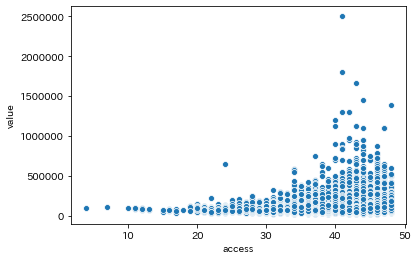

In [345]:
sns.scatterplot(x="access",y="value",data=train)

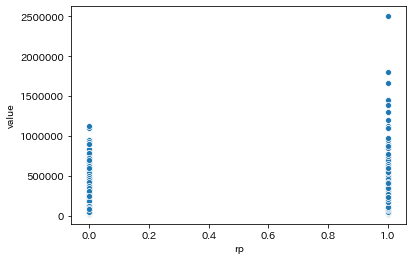

In [346]:
sns.scatterplot(x="rp",y="value",data=train)

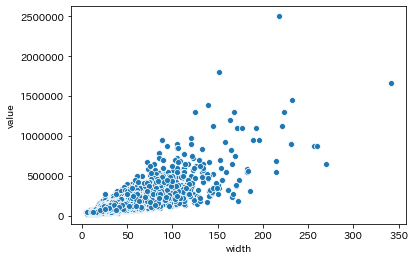

In [347]:
sns.scatterplot(x="width",y="value",data=train)

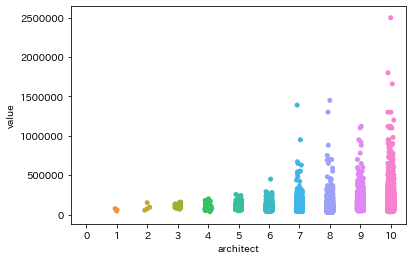

In [348]:
sns.stripplot(x="architect",y="value",data=df1)

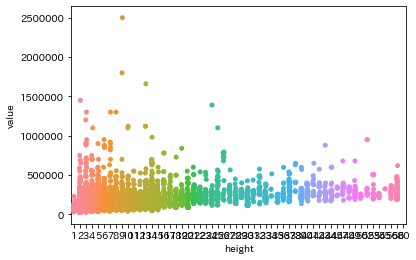

In [349]:
sns.stripplot(x="height",y="value",data=df1)

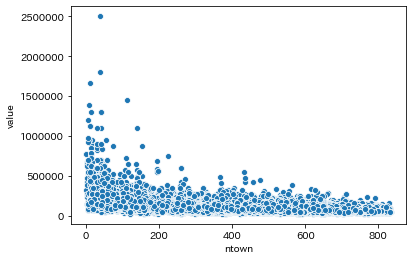

In [350]:
sns.scatterplot(x="ntown",y="value",data=df1)

In [351]:
# townlist=list(train.groupby("town").value.mean().sort_values().index)
# towndic={}
# for i, feat in enumerate(townlist):
#     towndic[feat]=i
# towndic
# ntown=df1.town.map(towndic)
# ntown[ntown.isnull()]=280
# ntown=834-ntown
# ntownlist=list(ntown[ntown.isnull()].index)


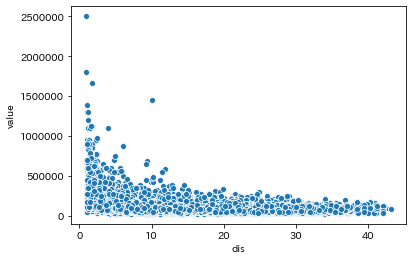

In [352]:
sns.scatterplot(x="dis",y="value",data=train)


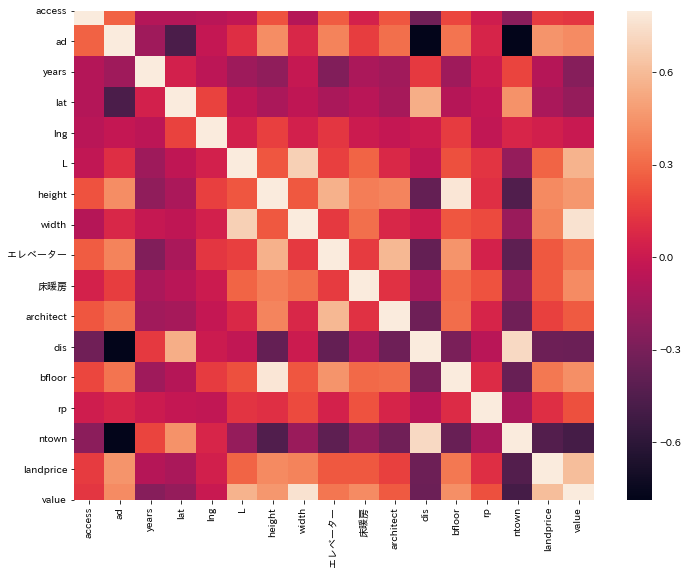

In [353]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

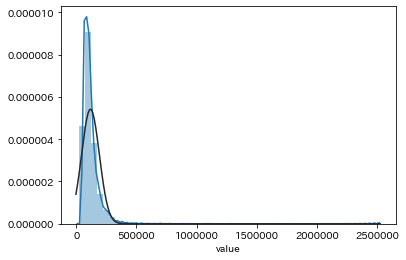

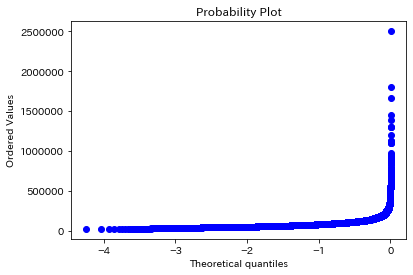

In [354]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df1["value"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1["value"], plot=plt)

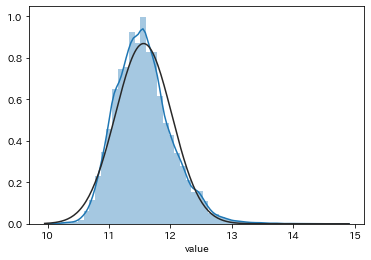

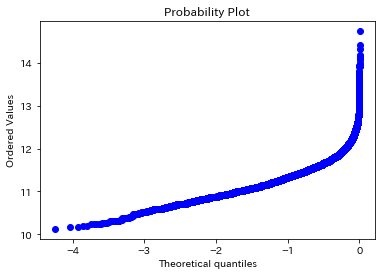

In [355]:
df1["value"]=np.log(df1.value)
# df1["value"]=stats.boxcox( df1.value, lmbda =-1 )
#transformed histogram and normal probability plot
sns.distplot(df1.value.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1.value, plot=plt)

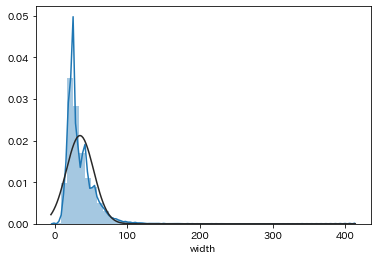

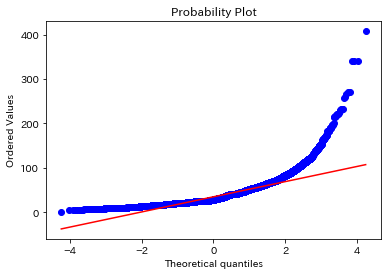

In [356]:
sns.distplot(df1["width"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1["width"], plot=plt)

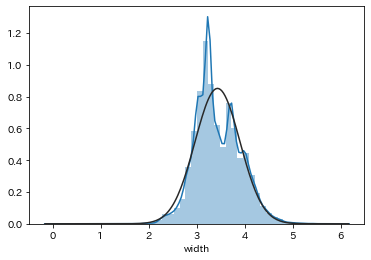

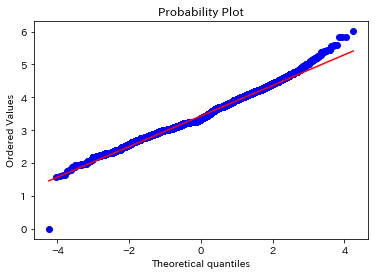

In [357]:
df1["width"]=np.log(df1.width)
#transformed histogram and normal probability plot
sns.distplot(df1.width.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1.width, plot=plt)

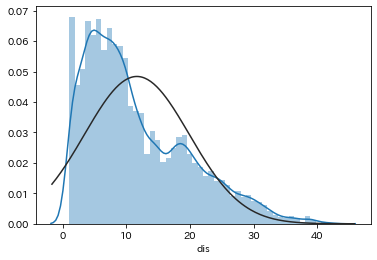

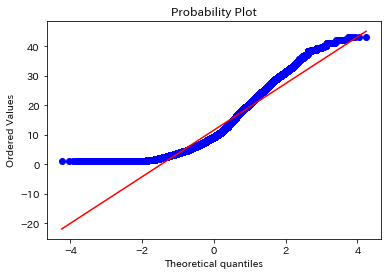

In [358]:
sns.distplot(df1["dis"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1["dis"], plot=plt)

In [359]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy import stats

# fig = plt.figure(figsize=(6.0, 6.0))
# aaa=pd.DataFrame()
# list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
# for i, i_lambda in enumerate(list_lambda):
#     aaa[ 'val_'+str(i) ] = stats.boxcox( df1.dis, lmbda = i_lambda )
#     fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
#     plt.title("lambda="+str(list_lambda[i]))
#     plt.xlabel('val')
#     plt.ylabel('density')

# aaa[ 'val_auto' ], best_lambda = stats.boxcox( df1.dis)
# fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
# plt.title("lambda="+str(round(best_lambda, 2)))
# plt.xlabel('val')
# plt.ylabel('density')

# fig.tight_layout()
# fig.show()
# plt.show()

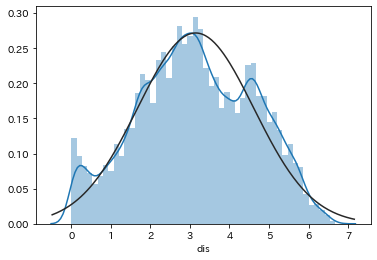

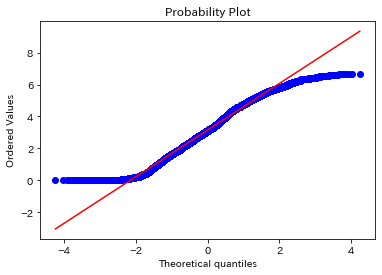

In [360]:
df1["dis"]=stats.boxcox( df1.dis, lmbda =0.28 )
#transformed histogram and normal probability plot
sns.distplot(df1.dis.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1.dis, plot=plt)

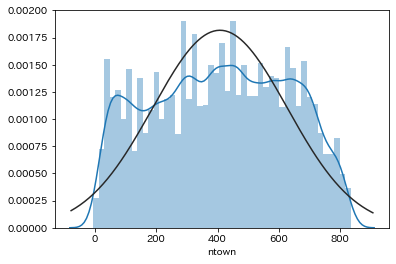

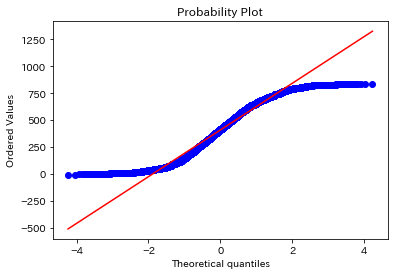

In [361]:
sns.distplot(df1["ntown"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1["ntown"], plot=plt)

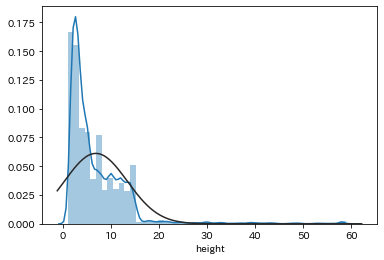

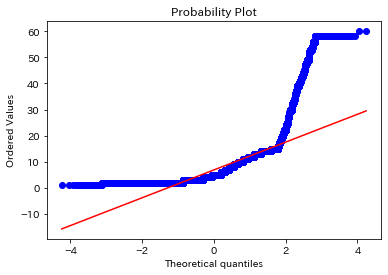

In [362]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df1["height"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1["height"], plot=plt)

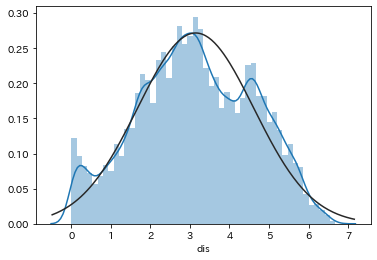

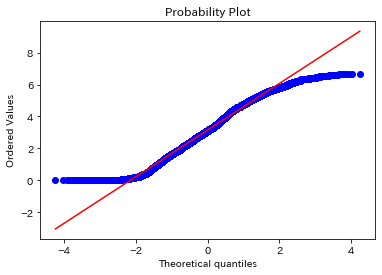

In [363]:
df1["height"]=stats.boxcox( df1.height, lmbda =0.28 )
#transformed histogram and normal probability plot
sns.distplot(df1.dis.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1.dis, plot=plt)

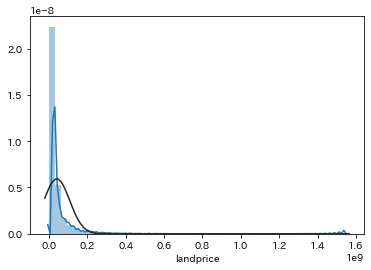

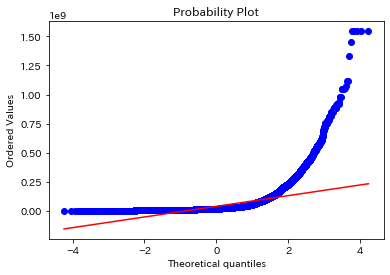

In [364]:
sns.distplot(df1["landprice"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df1["landprice"], plot=plt)

In [365]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy import stats

# fig = plt.figure(figsize=(6.0, 6.0))
# aaa=pd.DataFrame()
# list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
# for i, i_lambda in enumerate(list_lambda):
#     aaa[ 'val_'+str(i) ] = stats.boxcox( df1.landprice, lmbda = i_lambda )
#     fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
#     plt.title("lambda="+str(list_lambda[i]))
#     plt.xlabel('val')
#     plt.ylabel('density')

# aaa[ 'val_auto' ], best_lambda = stats.boxcox( df1.landprice)
# fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
# plt.title("lambda="+str(round(best_lambda, 2)))
# plt.xlabel('val')
# plt.ylabel('density')

# fig.tight_layout()
# fig.show()
# plt.show()

In [366]:
# from scipy import stats
# from scipy.stats import norm
# sns.distplot(df1["access0"].dropna(), fit=norm);
# fig = plt.figure()
# res = stats.probplot(df1["access0"], plot=plt)

In [367]:
# df1["landprice"]=stats.boxcox( df1.landprice, lmbda =-0.5 )
# #transformed histogram and normal probability plot
# sns.distplot(df1.landprice.dropna(), fit=norm);
# fig = plt.figure()
# res = stats.probplot(df1.landprice, plot=plt)

In [385]:
from sklearn.model_selection import train_test_split, GridSearchCV

train = df1.dropna()
test=df1[df1.isnull().any(axis=1)]
test= pd.get_dummies(test).drop(["value",],axis=1)
X = pd.get_dummies(train).drop(["value",],axis=1).reset_index()

#　目的変数に家賃単価を代入する
y = train.value.reset_index()
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

In [386]:
from sklearn.preprocessing import StandardScaler
categorical_variable_names = ['L',"エレベーター","床暖房","rp"]
# カテゴリ変数に一括変換
x_dummy = X[categorical_variable_names]
X=X.drop(categorical_variable_names, axis=1)
sscaler =StandardScaler()
sscaler.fit(X)  

x_datas_std =sscaler.transform(X)
x_datas_std = pd.DataFrame(x_datas_std, columns=X.columns)
X= pd.concat([x_datas_std, x_dummy], axis=1)

31465

In [382]:
#重回帰分析
import sklearn
from sklearn.linear_model import LinearRegression as LR

model=LR()

model.fit(train_X, train_y)

linearpred=model.predict(valid_X)

In [383]:
model.score(valid_X,valid_y)

0.9239897153200546

In [384]:
from sklearn.ensemble import RandomForestRegressor as RFR
 

rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_X,train_y)
print(rg.score(valid_X,valid_y))
from sklearn.metrics import mean_squared_error
print("randomforest :"+str(np.sqrt(mean_squared_error(np.exp(valid_y),np.exp(rg.predict(valid_X))))) )

0.9534838792037426
randomforest :15832.554444233203


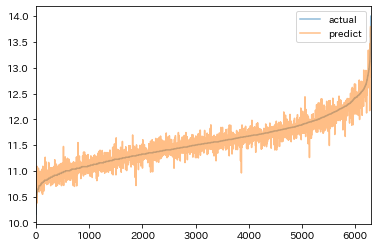

In [256]:

checktesty=valid_y.sort_values()
checktestX=valid_X.ix[list(checktesty.index)]
checktesty=checktesty.reset_index(drop=True)#これと

checkpred=pd.DataFrame(rg.predict(checktestX))#これ
# checktesty.plot()
# checkpred.plot()
check=pd.concat([checktesty,checkpred], axis=1)
check.columns=["actual","predict"]
# checktesty
check.plot(alpha=0.5)

In [257]:
fti = rg.feature_importances_

print('Feature Importances:')
for i,feat in enumerate(valid_X.columns):
    print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	access     : 0.004954
	ad         : 0.004134
	years      : 0.071211
	lat        : 0.008514
	lng        : 0.007605
	L          : 0.415183
	height     : 0.008936
	width      : 0.105715
	エレベーター     : 0.012165
	床暖房        : 0.000497
	architect  : 0.017074
	dis        : 0.022117
	bfloor     : 0.003898
	rp         : 0.000699
	ntown      : 0.037040
	landprice  : 0.280257


In [258]:
col_names = valid_X.columns.values
col_names_ = col_names[np.argsort(rg.feature_importances_)[::-1]]
col_names_

array(['L', 'landprice', 'width', 'years', 'ntown', 'dis', 'architect',
       'エレベーター', 'height', 'lat', 'lng', 'access', 'ad', 'bfloor', 'rp',
       '床暖房'], dtype=object)

In [259]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rg, X, y)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np

import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.95551451 0.95308255 0.95615041]
Average score: 0.9549158236315324


In [260]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import optuna

class RidgeCV():
    model_cls = Ridge

    def __init__(self, n_trials=100):
        self.n_trials = n_trials

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)
        elif isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

        self.X = X
        self.y = y

        study = optuna.create_study(direction='maximize')
        study.optimize(self, n_trials=self.n_trials)
        self.best_trial = study.best_trial

        print()
        print("Best score:", round(self.best_trial.value, 2))
        print("Best params:", self.best_trial.params)
        print()

        self.best_model = self.model_cls(**self.best_trial.params)
        self.best_model.fit(self.X, self.y)

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X.values.reshape(1, -1))
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        return self.best_model.predict(X)

    def score(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)

        return self.best_model.score(X, y)

    def kfold_cv(self, model, splits=5):
        scores = []
        scores1=[]

        kf = KFold(n_splits=splits, shuffle=True)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))

        score = np.array(scores).mean()
        print((np.sqrt(mean_squared_error(np.exp(y_test),np.exp(model.predict(X_test)))) ))
        return score

import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

class XGBRegressorCV(RidgeCV):
    model_cls = xgb.XGBRegressor

    def __call__(self, trial):
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
        alpha = trial.suggest_loguniform('alpha', 1e-8, 1.0)

        max_depth = trial.suggest_int('max_depth', 1, 14)
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        grow_policy = trial.suggest_categorical(
            'grow_policy', ['depthwise', 'lossguide'])

        if booster == 'gbtree':
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy)
        elif booster == 'dart':
            sample_type = trial.suggest_categorical('sample_type',
                                                    ['uniform', 'weighted'])
            normalize_type = trial.suggest_categorical('normalize_type',
                                                       ['tree', 'forest'])
            rate_drop = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
            skip_drop = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy,
                                   sample_type=sample_type,
                                   normalize_type=normalize_type,
                                   rate_drop=rate_drop, skip_drop=skip_drop)

        score = self.kfold_cv(model)
        print()
        return score

xgbr = XGBRegressorCV(n_trials=10)
xgbr.fit(train_X, train_y)

[I 2019-10-31 00:45:56,602] Finished trial#0 resulted in value: -74.17579322069341. Current best value is -74.17579322069341 with parameters: {'booster': 'dart', 'alpha': 6.16560042996019e-05, 'max_depth': 11, 'eta': 1.4182269943665722e-07, 'gamma': 0.5115758186012228, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.2578951940985022, 'skip_drop': 0.0059430076977898755}.


129238.88404855922



[I 2019-10-31 00:46:15,825] Finished trial#1 resulted in value: 0.9609071617345937. Current best value is 0.9609071617345937 with parameters: {'booster': 'gbtree', 'alpha': 4.0814771322534564e-08, 'max_depth': 9, 'eta': 0.0001467192234367107, 'gamma': 5.5156215841304325e-08, 'grow_policy': 'lossguide'}.


16969.227072328937



[I 2019-10-31 00:46:39,275] Finished trial#2 resulted in value: 0.9629164899493331. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


15326.161003329575



[I 2019-10-31 00:46:50,680] Finished trial#3 resulted in value: 0.9422501244861949. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


23367.95169468338



[I 2019-10-31 00:48:06,596] Finished trial#4 resulted in value: 0.962099951016555. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


29828.654658645857



[I 2019-10-31 00:48:37,122] Finished trial#5 resulted in value: 0.9458065401303253. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


20113.51524582314



[I 2019-10-31 00:49:03,584] Finished trial#6 resulted in value: 0.9269596497960304. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


21426.06790892017

21625.26177807507



[I 2019-10-31 00:49:16,748] Finished trial#7 resulted in value: 0.9532656555194536. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


33484.98591303312



[I 2019-10-31 00:49:57,155] Finished trial#8 resulted in value: 0.9385213102410198. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.


18471.155265691017



[I 2019-10-31 00:50:09,032] Finished trial#9 resulted in value: 0.9388344317260569. Current best value is 0.9629164899493331 with parameters: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}.



Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.05524307086372921, 'max_depth': 11, 'eta': 0.0004910302465611108, 'gamma': 1.5828495897370683e-08, 'grow_policy': 'lossguide'}

[00:50:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("XGB :"+str(np.sqrt(mean_squared_error(np.exp(valid_y),np.exp(xgbr.predict(valid_X)))) ))

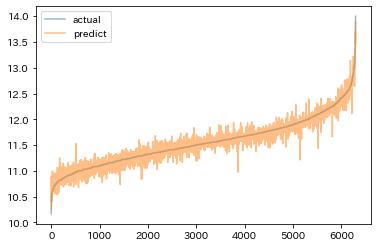

In [480]:

checktesty=valid_y.sort_values()
checktestX=valid_X.ix[list(checktesty.index)]
checktesty=checktesty.reset_index(drop=True)#これと

checkpred=pd.DataFrame(xgbr.predict(checktestX))#これ
# checktesty.plot()
# checkpred.plot()
check=pd.concat([checktesty,checkpred], axis=1)
check.columns=["actual","predict"]
# checktesty
check.plot(alpha=0.5)

In [70]:
from catboost import CatBoost
from catboost import Pool

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from catboost import Pool
from sklearn.metrics import accuracy_score
def objective(trial):
    # トレーニングデータとテストデータを分割
    train_pool = Pool(train_X, label=train_y)
    test_pool = Pool(valid_X, label=valid_y)

    # パラメータの指定
    params = {
        'iterations' : trial.suggest_int('iterations', 50, 300),                         
        'depth' : trial.suggest_int('depth', 4, 16),                                       
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),               
        'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait' :trial.suggest_int('od_wait', 10, 50),
        'loss_function': 'RMSE',
    }

    # 学習
    model = CatBoost(params)
    model.fit(train_pool)
    # 予測
    preds = model.predict(test_pool)
#     print(preds)
#     pred_labels = np.rint(preds)
    # 精度の計算
    return np.sqrt(mean_squared_error(np.exp(valid_y),np.exp(preds)))

import optuna
study = optuna.create_study()
study.optimize(objective, n_trials=100)
print(study.best_trial)

# train_pool = Pool(train_X, label=train_y)
# test_pool = Pool(valid_X, label=valid_y)

# params = {
#     # 損失関数に RMSE を使う
#     'loss_function': 'RMSE',
#     'num_boost_round': 1000,
#     'early_stopping_rounds': 10,
# }

# model = CatBoost(params)
# model.fit(train_pool, eval_set=[test_pool])

# y_pred = model.predict(test_pool)

# # 最終的なモデルの RMSE を計算する
# mse = mean_squared_error(np.exp(valid_y), np.exp(y_pred))
# print('RMSE:', np.sqrt(mse))

0:	learn: 0.4493356	total: 1.25s	remaining: 2m 1s
1:	learn: 0.4392945	total: 1.98s	remaining: 1m 34s
2:	learn: 0.4293218	total: 2.64s	remaining: 1m 23s
3:	learn: 0.4197988	total: 2.93s	remaining: 1m 8s
4:	learn: 0.4112073	total: 3.65s	remaining: 1m 7s
5:	learn: 0.4018680	total: 4.34s	remaining: 1m 6s
6:	learn: 0.3930129	total: 5.03s	remaining: 1m 5s
7:	learn: 0.3873827	total: 5.04s	remaining: 56.7s
8:	learn: 0.3792683	total: 5.3s	remaining: 52.4s
9:	learn: 0.3727852	total: 5.32s	remaining: 46.8s
10:	learn: 0.3656038	total: 5.99s	remaining: 47.4s
11:	learn: 0.3584462	total: 6.75s	remaining: 48.4s
12:	learn: 0.3509824	total: 7.49s	remaining: 48.9s
13:	learn: 0.3444670	total: 8.13s	remaining: 48.8s
14:	learn: 0.3375154	total: 8.81s	remaining: 48.8s
15:	learn: 0.3311601	total: 9.46s	remaining: 48.5s
16:	learn: 0.3245184	total: 10.1s	remaining: 48.3s
17:	learn: 0.3181668	total: 10.8s	remaining: 48s
18:	learn: 0.3117467	total: 11.4s	remaining: 47.6s
19:	learn: 0.3063835	total: 12.1s	remainin

[I 2019-10-30 16:17:24,838] Finished trial#0 resulted in value: 29448.709115258727. Current best value is 29448.709115258727 with parameters: {'iterations': 98, 'depth': 14, 'learning_rate': 0.03042011355852778, 'random_strength': 30, 'bagging_temperature': 4.6674329572599635, 'od_type': 'IncToDec', 'od_wait': 24}.


0:	learn: 0.4293967	total: 24.5ms	remaining: 5.1s
1:	learn: 0.4006270	total: 41.3ms	remaining: 4.27s
2:	learn: 0.3748470	total: 53.5ms	remaining: 3.67s
3:	learn: 0.3513696	total: 66.9ms	remaining: 3.43s
4:	learn: 0.3297274	total: 74.3ms	remaining: 3.03s
5:	learn: 0.3104821	total: 80.8ms	remaining: 2.73s
6:	learn: 0.2919133	total: 87.3ms	remaining: 2.52s
7:	learn: 0.2757168	total: 93.1ms	remaining: 2.34s
8:	learn: 0.2606370	total: 99.9ms	remaining: 2.22s
9:	learn: 0.2466210	total: 107ms	remaining: 2.12s
10:	learn: 0.2342518	total: 113ms	remaining: 2.04s
11:	learn: 0.2229405	total: 120ms	remaining: 1.96s
12:	learn: 0.2120407	total: 127ms	remaining: 1.91s
13:	learn: 0.2027146	total: 133ms	remaining: 1.86s
14:	learn: 0.1940035	total: 139ms	remaining: 1.8s
15:	learn: 0.1865037	total: 147ms	remaining: 1.77s
16:	learn: 0.1788946	total: 154ms	remaining: 1.74s
17:	learn: 0.1726502	total: 160ms	remaining: 1.7s
18:	learn: 0.1669349	total: 167ms	remaining: 1.67s
19:	learn: 0.1616249	total: 173ms	r

175:	learn: 0.0937518	total: 1.64s	remaining: 308ms
176:	learn: 0.0936682	total: 1.66s	remaining: 299ms
177:	learn: 0.0936025	total: 1.66s	remaining: 289ms
178:	learn: 0.0935569	total: 1.67s	remaining: 279ms
179:	learn: 0.0934994	total: 1.67s	remaining: 270ms
180:	learn: 0.0933930	total: 1.68s	remaining: 260ms
181:	learn: 0.0933169	total: 1.69s	remaining: 250ms
182:	learn: 0.0932518	total: 1.69s	remaining: 240ms
183:	learn: 0.0931704	total: 1.7s	remaining: 231ms
184:	learn: 0.0930700	total: 1.7s	remaining: 221ms
185:	learn: 0.0929952	total: 1.71s	remaining: 212ms
186:	learn: 0.0929204	total: 1.72s	remaining: 202ms
187:	learn: 0.0928321	total: 1.72s	remaining: 192ms
188:	learn: 0.0927957	total: 1.73s	remaining: 183ms
189:	learn: 0.0927123	total: 1.73s	remaining: 173ms
190:	learn: 0.0926487	total: 1.74s	remaining: 164ms
191:	learn: 0.0925775	total: 1.75s	remaining: 155ms
192:	learn: 0.0925122	total: 1.75s	remaining: 145ms
193:	learn: 0.0924779	total: 1.76s	remaining: 136ms
194:	learn: 0.

[I 2019-10-30 16:17:26,997] Finished trial#1 resulted in value: 17304.01584610501. Current best value is 17304.01584610501 with parameters: {'iterations': 209, 'depth': 7, 'learning_rate': 0.08487259170934904, 'random_strength': 1, 'bagging_temperature': 64.68404779182042, 'od_type': 'Iter', 'od_wait': 39}.


206:	learn: 0.0914730	total: 1.84s	remaining: 17.7ms
207:	learn: 0.0914412	total: 1.84s	remaining: 8.86ms
208:	learn: 0.0913739	total: 1.85s	remaining: 0us
0:	learn: 0.4510821	total: 17.2ms	remaining: 1.32s
1:	learn: 0.4439257	total: 29.1ms	remaining: 1.1s
2:	learn: 0.4346040	total: 42.8ms	remaining: 1.07s
3:	learn: 0.4254957	total: 54.5ms	remaining: 1.01s
4:	learn: 0.4169371	total: 65.9ms	remaining: 962ms
5:	learn: 0.4087526	total: 77.4ms	remaining: 928ms
6:	learn: 0.4004562	total: 88.9ms	remaining: 902ms
7:	learn: 0.3924500	total: 101ms	remaining: 883ms
8:	learn: 0.3870102	total: 117ms	remaining: 897ms
9:	learn: 0.3795149	total: 132ms	remaining: 894ms
10:	learn: 0.3739443	total: 136ms	remaining: 829ms
11:	learn: 0.3660091	total: 151ms	remaining: 829ms
12:	learn: 0.3613649	total: 154ms	remaining: 768ms
13:	learn: 0.3558058	total: 165ms	remaining: 753ms
14:	learn: 0.3494065	total: 178ms	remaining: 746ms
15:	learn: 0.3434319	total: 186ms	remaining: 719ms
16:	learn: 0.3370935	total: 197m

[I 2019-10-30 16:17:28,348] Finished trial#2 resulted in value: 34471.5999036679. Current best value is 17304.01584610501 with parameters: {'iterations': 209, 'depth': 7, 'learning_rate': 0.08487259170934904, 'random_strength': 1, 'bagging_temperature': 64.68404779182042, 'od_type': 'Iter', 'od_wait': 39}.


0:	learn: 0.4529151	total: 24.1ms	remaining: 7.11s
1:	learn: 0.4459318	total: 43.3ms	remaining: 6.37s
2:	learn: 0.4373197	total: 56.5ms	remaining: 5.52s
3:	learn: 0.4289213	total: 68.2ms	remaining: 4.98s
4:	learn: 0.4213904	total: 84.8ms	remaining: 4.94s
5:	learn: 0.4142041	total: 96.8ms	remaining: 4.68s
6:	learn: 0.4064555	total: 112ms	remaining: 4.63s
7:	learn: 0.3996109	total: 125ms	remaining: 4.5s
8:	learn: 0.3944222	total: 137ms	remaining: 4.38s
9:	learn: 0.3873471	total: 149ms	remaining: 4.27s
10:	learn: 0.3817235	total: 154ms	remaining: 3.98s
11:	learn: 0.3749862	total: 166ms	remaining: 3.93s
12:	learn: 0.3705809	total: 170ms	remaining: 3.69s
13:	learn: 0.3653698	total: 181ms	remaining: 3.65s
14:	learn: 0.3592144	total: 193ms	remaining: 3.61s
15:	learn: 0.3559507	total: 198ms	remaining: 3.47s
16:	learn: 0.3502878	total: 210ms	remaining: 3.44s
17:	learn: 0.3448308	total: 222ms	remaining: 3.43s
18:	learn: 0.3395234	total: 233ms	remaining: 3.4s
19:	learn: 0.3340520	total: 246ms	rem

162:	learn: 0.1295533	total: 3.5s	remaining: 2.86s
163:	learn: 0.1293343	total: 3.54s	remaining: 2.85s
164:	learn: 0.1290101	total: 3.57s	remaining: 2.84s
165:	learn: 0.1288003	total: 3.61s	remaining: 2.82s
166:	learn: 0.1285263	total: 3.64s	remaining: 2.81s
167:	learn: 0.1282045	total: 3.67s	remaining: 2.79s
168:	learn: 0.1280251	total: 3.77s	remaining: 2.83s
169:	learn: 0.1279640	total: 3.83s	remaining: 2.84s
170:	learn: 0.1278723	total: 3.86s	remaining: 2.82s
171:	learn: 0.1276631	total: 3.89s	remaining: 2.8s
172:	learn: 0.1273423	total: 3.92s	remaining: 2.79s
173:	learn: 0.1272192	total: 3.94s	remaining: 2.76s
174:	learn: 0.1268756	total: 3.96s	remaining: 2.73s
175:	learn: 0.1267559	total: 3.98s	remaining: 2.71s
176:	learn: 0.1266164	total: 4.04s	remaining: 2.72s
177:	learn: 0.1264764	total: 4.09s	remaining: 2.71s
178:	learn: 0.1263104	total: 4.12s	remaining: 2.69s
179:	learn: 0.1262014	total: 4.15s	remaining: 2.68s
180:	learn: 0.1261007	total: 4.18s	remaining: 2.65s
181:	learn: 0.

[I 2019-10-30 16:17:35,370] Finished trial#3 resulted in value: 23203.450728521824. Current best value is 17304.01584610501 with parameters: {'iterations': 209, 'depth': 7, 'learning_rate': 0.08487259170934904, 'random_strength': 1, 'bagging_temperature': 64.68404779182042, 'od_type': 'Iter', 'od_wait': 39}.


0:	learn: 0.3922571	total: 75.1ms	remaining: 21.9s
1:	learn: 0.3366606	total: 172ms	remaining: 25s
2:	learn: 0.2910811	total: 304ms	remaining: 29.3s
3:	learn: 0.2535751	total: 402ms	remaining: 29.1s
4:	learn: 0.2232069	total: 483ms	remaining: 27.8s
5:	learn: 0.1983301	total: 580ms	remaining: 27.8s
6:	learn: 0.1782106	total: 804ms	remaining: 32.8s
7:	learn: 0.1624379	total: 930ms	remaining: 33.1s
8:	learn: 0.1495560	total: 1.06s	remaining: 33.5s
9:	learn: 0.1394355	total: 1.14s	remaining: 32.1s
10:	learn: 0.1314335	total: 1.21s	remaining: 31s
11:	learn: 0.1250659	total: 1.28s	remaining: 30.1s
12:	learn: 0.1197371	total: 1.36s	remaining: 29.3s
13:	learn: 0.1157509	total: 1.46s	remaining: 29.1s
14:	learn: 0.1123395	total: 1.53s	remaining: 28.3s
15:	learn: 0.1097241	total: 1.62s	remaining: 28s
16:	learn: 0.1075003	total: 1.68s	remaining: 27.3s
17:	learn: 0.1056248	total: 1.87s	remaining: 28.5s
18:	learn: 0.1039120	total: 1.98s	remaining: 28.5s
19:	learn: 0.1026162	total: 2.09s	remaining: 2

162:	learn: 0.0604594	total: 15s	remaining: 11.9s
163:	learn: 0.0602725	total: 15s	remaining: 11.8s
164:	learn: 0.0600736	total: 15.1s	remaining: 11.7s
165:	learn: 0.0599648	total: 15.2s	remaining: 11.6s
166:	learn: 0.0598069	total: 15.3s	remaining: 11.5s
167:	learn: 0.0596621	total: 15.4s	remaining: 11.4s
168:	learn: 0.0596611	total: 15.4s	remaining: 11.3s
169:	learn: 0.0596586	total: 15.4s	remaining: 11.2s
170:	learn: 0.0595301	total: 15.5s	remaining: 11.1s
171:	learn: 0.0594211	total: 15.6s	remaining: 11s
172:	learn: 0.0594122	total: 15.6s	remaining: 10.8s
173:	learn: 0.0593308	total: 15.7s	remaining: 10.7s
174:	learn: 0.0591612	total: 15.7s	remaining: 10.6s
175:	learn: 0.0590357	total: 15.8s	remaining: 10.5s
176:	learn: 0.0589081	total: 15.9s	remaining: 10.4s
177:	learn: 0.0588495	total: 16.1s	remaining: 10.4s
178:	learn: 0.0586751	total: 16.2s	remaining: 10.3s
179:	learn: 0.0585214	total: 16.3s	remaining: 10.2s
180:	learn: 0.0584823	total: 16.3s	remaining: 10.1s
181:	learn: 0.0583

[I 2019-10-30 16:18:03,593] Finished trial#4 resulted in value: 15098.66058282772. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4047624	total: 6.17ms	remaining: 1.38s
1:	learn: 0.3523536	total: 11.9ms	remaining: 1.32s
2:	learn: 0.3090193	total: 18.7ms	remaining: 1.38s
3:	learn: 0.2728444	total: 25.1ms	remaining: 1.38s
4:	learn: 0.2494015	total: 34.7ms	remaining: 1.53s
5:	learn: 0.2265341	total: 41ms	remaining: 1.5s
6:	learn: 0.2106234	total: 46.7ms	remaining: 1.46s
7:	learn: 0.2000596	total: 52.3ms	remaining: 1.42s
8:	learn: 0.1855708	total: 57.3ms	remaining: 1.38s
9:	learn: 0.1806121	total: 63ms	remaining: 1.35s
10:	learn: 0.1747922	total: 68.8ms	remaining: 1.34s
11:	learn: 0.1729543	total: 76ms	remaining: 1.35s
12:	learn: 0.1696995	total: 81.9ms	remaining: 1.33s
13:	learn: 0.1639181	total: 87.2ms	remaining: 1.31s
14:	learn: 0.1608977	total: 92.9ms	remaining: 1.3s
15:	learn: 0.1544249	total: 98.2ms	remaining: 1.28s
16:	learn: 0.1506628	total: 102ms	remaining: 1.25s
17:	learn: 0.1484562	total: 108ms	remaining: 1.24s
18:	learn: 0.1473150	total: 113ms	remaining: 1.23s
19:	learn: 0.1459829	total: 119ms

161:	learn: 0.0906861	total: 1.43s	remaining: 555ms
162:	learn: 0.0905615	total: 1.44s	remaining: 546ms
163:	learn: 0.0904434	total: 1.45s	remaining: 538ms
164:	learn: 0.0903464	total: 1.45s	remaining: 528ms
165:	learn: 0.0902606	total: 1.49s	remaining: 528ms
166:	learn: 0.0901262	total: 1.49s	remaining: 518ms
167:	learn: 0.0900067	total: 1.5s	remaining: 508ms
168:	learn: 0.0898793	total: 1.5s	remaining: 498ms
169:	learn: 0.0897390	total: 1.53s	remaining: 496ms
170:	learn: 0.0896318	total: 1.54s	remaining: 488ms
171:	learn: 0.0895238	total: 1.55s	remaining: 479ms
172:	learn: 0.0894474	total: 1.58s	remaining: 477ms
173:	learn: 0.0893597	total: 1.59s	remaining: 466ms
174:	learn: 0.0892509	total: 1.6s	remaining: 456ms
175:	learn: 0.0891365	total: 1.6s	remaining: 447ms
176:	learn: 0.0890633	total: 1.63s	remaining: 443ms
177:	learn: 0.0889438	total: 1.64s	remaining: 433ms
178:	learn: 0.0888169	total: 1.65s	remaining: 423ms
179:	learn: 0.0887341	total: 1.65s	remaining: 413ms
180:	learn: 0.08

[I 2019-10-30 16:18:06,651] Finished trial#5 resulted in value: 15939.325244021975. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4552028	total: 82.7ms	remaining: 10.8s
1:	learn: 0.4505811	total: 159ms	remaining: 10.3s
2:	learn: 0.4459483	total: 305ms	remaining: 13s
3:	learn: 0.4414761	total: 373ms	remaining: 11.8s
4:	learn: 0.4370916	total: 441ms	remaining: 11.1s
5:	learn: 0.4326206	total: 517ms	remaining: 10.8s
6:	learn: 0.4285618	total: 628ms	remaining: 11.1s
7:	learn: 0.4246826	total: 720ms	remaining: 11.1s
8:	learn: 0.4202864	total: 801ms	remaining: 10.9s
9:	learn: 0.4161182	total: 873ms	remaining: 10.6s
10:	learn: 0.4125651	total: 877ms	remaining: 9.57s
11:	learn: 0.4085450	total: 947ms	remaining: 9.39s
12:	learn: 0.4047319	total: 1.02s	remaining: 9.24s
13:	learn: 0.4008461	total: 1.08s	remaining: 9.07s
14:	learn: 0.3970679	total: 1.16s	remaining: 8.97s
15:	learn: 0.3930371	total: 1.23s	remaining: 8.84s
16:	learn: 0.3899950	total: 1.23s	remaining: 8.27s
17:	learn: 0.3860797	total: 1.31s	remaining: 8.21s
18:	learn: 0.3821407	total: 1.38s	remaining: 8.13s
19:	learn: 0.3784165	total: 1.45s	remainin

[I 2019-10-30 16:18:15,368] Finished trial#6 resulted in value: 37062.018252176975. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


130:	learn: 0.1746985	total: 8.35s	remaining: 0us
0:	learn: 0.4568623	total: 5.6ms	remaining: 1.11s
1:	learn: 0.4530145	total: 9.97ms	remaining: 982ms
2:	learn: 0.4501143	total: 15.2ms	remaining: 996ms
3:	learn: 0.4474773	total: 22.9ms	remaining: 1.12s
4:	learn: 0.4453544	total: 28ms	remaining: 1.09s
5:	learn: 0.4422555	total: 32.2ms	remaining: 1.04s
6:	learn: 0.4397480	total: 36.4ms	remaining: 999ms
7:	learn: 0.4363878	total: 40.7ms	remaining: 971ms
8:	learn: 0.4333941	total: 44.5ms	remaining: 939ms
9:	learn: 0.4304879	total: 49ms	remaining: 926ms
10:	learn: 0.4271782	total: 53ms	remaining: 905ms
11:	learn: 0.4243376	total: 56.9ms	remaining: 887ms
12:	learn: 0.4210739	total: 61.8ms	remaining: 885ms
13:	learn: 0.4188506	total: 69ms	remaining: 912ms
14:	learn: 0.4168581	total: 75.2ms	remaining: 922ms
15:	learn: 0.4141953	total: 79.2ms	remaining: 906ms
16:	learn: 0.4120990	total: 83.3ms	remaining: 892ms
17:	learn: 0.4097204	total: 87.4ms	remaining: 879ms
18:	learn: 0.4064229	total: 91.3m

176:	learn: 0.1990220	total: 780ms	remaining: 97ms
177:	learn: 0.1983529	total: 791ms	remaining: 93.3ms
178:	learn: 0.1975737	total: 800ms	remaining: 89.4ms
179:	learn: 0.1969961	total: 810ms	remaining: 85.5ms
180:	learn: 0.1964349	total: 821ms	remaining: 81.6ms
181:	learn: 0.1960134	total: 825ms	remaining: 77ms
182:	learn: 0.1954781	total: 828ms	remaining: 72.4ms
183:	learn: 0.1949318	total: 833ms	remaining: 67.9ms
184:	learn: 0.1942747	total: 837ms	remaining: 63.3ms
185:	learn: 0.1934837	total: 840ms	remaining: 58.7ms
186:	learn: 0.1932600	total: 844ms	remaining: 54.2ms
187:	learn: 0.1926405	total: 848ms	remaining: 49.6ms
188:	learn: 0.1921582	total: 852ms	remaining: 45.1ms
189:	learn: 0.1916716	total: 856ms	remaining: 40.5ms
190:	learn: 0.1910756	total: 860ms	remaining: 36ms
191:	learn: 0.1907282	total: 864ms	remaining: 31.5ms
192:	learn: 0.1902161	total: 868ms	remaining: 27ms
193:	learn: 0.1898506	total: 872ms	remaining: 22.5ms
194:	learn: 0.1894459	total: 876ms	remaining: 18ms
195

[I 2019-10-30 16:18:16,509] Finished trial#7 resulted in value: 38164.2837931657. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4391762	total: 11.4ms	remaining: 3.16s
1:	learn: 0.4194020	total: 19.8ms	remaining: 2.74s
2:	learn: 0.4004062	total: 30.7ms	remaining: 2.81s
3:	learn: 0.3913425	total: 39.2ms	remaining: 2.68s
4:	learn: 0.3750607	total: 47.2ms	remaining: 2.58s
5:	learn: 0.3600920	total: 55.8ms	remaining: 2.53s
6:	learn: 0.3436700	total: 64.8ms	remaining: 2.51s
7:	learn: 0.3325223	total: 73.2ms	remaining: 2.47s
8:	learn: 0.3236734	total: 81.2ms	remaining: 2.42s
9:	learn: 0.3109380	total: 89.5ms	remaining: 2.4s
10:	learn: 0.3004142	total: 97.5ms	remaining: 2.37s
11:	learn: 0.2921307	total: 103ms	remaining: 2.28s
12:	learn: 0.2794874	total: 111ms	remaining: 2.26s
13:	learn: 0.2694161	total: 120ms	remaining: 2.25s
14:	learn: 0.2599561	total: 129ms	remaining: 2.26s
15:	learn: 0.2514604	total: 137ms	remaining: 2.24s
16:	learn: 0.2417567	total: 145ms	remaining: 2.23s
17:	learn: 0.2347332	total: 153ms	remaining: 2.21s
18:	learn: 0.2271393	total: 161ms	remaining: 2.19s
19:	learn: 0.2218686	total: 169

178:	learn: 0.1064265	total: 1.6s	remaining: 887ms
179:	learn: 0.1062595	total: 1.61s	remaining: 878ms
180:	learn: 0.1060251	total: 1.62s	remaining: 869ms
181:	learn: 0.1058700	total: 1.63s	remaining: 860ms
182:	learn: 0.1056259	total: 1.64s	remaining: 851ms
183:	learn: 0.1054424	total: 1.65s	remaining: 841ms
184:	learn: 0.1053147	total: 1.66s	remaining: 832ms
185:	learn: 0.1050559	total: 1.66s	remaining: 823ms
186:	learn: 0.1048271	total: 1.67s	remaining: 814ms
187:	learn: 0.1045968	total: 1.68s	remaining: 806ms
188:	learn: 0.1043660	total: 1.69s	remaining: 797ms
189:	learn: 0.1041790	total: 1.7s	remaining: 787ms
190:	learn: 0.1039848	total: 1.71s	remaining: 778ms
191:	learn: 0.1038454	total: 1.72s	remaining: 769ms
192:	learn: 0.1035563	total: 1.73s	remaining: 760ms
193:	learn: 0.1034126	total: 1.73s	remaining: 751ms
194:	learn: 0.1031612	total: 1.74s	remaining: 742ms
195:	learn: 0.1029652	total: 1.75s	remaining: 733ms
196:	learn: 0.1027711	total: 1.76s	remaining: 723ms
197:	learn: 0.

[I 2019-10-30 16:18:19,347] Finished trial#8 resulted in value: 17140.22337357857. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4065744	total: 4.82ms	remaining: 1.26s
1:	learn: 0.3525013	total: 8.77ms	remaining: 1.14s
2:	learn: 0.3152432	total: 12.3ms	remaining: 1.07s
3:	learn: 0.2881947	total: 17.2ms	remaining: 1.12s
4:	learn: 0.2612007	total: 21.3ms	remaining: 1.1s
5:	learn: 0.2493737	total: 24.8ms	remaining: 1.06s
6:	learn: 0.2261847	total: 28.8ms	remaining: 1.05s
7:	learn: 0.2122293	total: 32.5ms	remaining: 1.03s
8:	learn: 0.2006861	total: 36.1ms	remaining: 1.02s
9:	learn: 0.1908707	total: 39.9ms	remaining: 1.01s
10:	learn: 0.1836018	total: 44.5ms	remaining: 1.02s
11:	learn: 0.1801396	total: 48.7ms	remaining: 1.02s
12:	learn: 0.1733692	total: 52.3ms	remaining: 1s
13:	learn: 0.1677534	total: 55.8ms	remaining: 992ms
14:	learn: 0.1639818	total: 59.2ms	remaining: 979ms
15:	learn: 0.1616957	total: 64.2ms	remaining: 991ms
16:	learn: 0.1597478	total: 72.7ms	remaining: 1.05s
17:	learn: 0.1583573	total: 81.4ms	remaining: 1.11s
18:	learn: 0.1559947	total: 88.3ms	remaining: 1.13s
19:	learn: 0.1516138	total

175:	learn: 0.0984438	total: 768ms	remaining: 379ms
176:	learn: 0.0983836	total: 775ms	remaining: 376ms
177:	learn: 0.0983199	total: 778ms	remaining: 372ms
178:	learn: 0.0982246	total: 783ms	remaining: 367ms
179:	learn: 0.0981440	total: 790ms	remaining: 364ms
180:	learn: 0.0980617	total: 797ms	remaining: 361ms
181:	learn: 0.0979826	total: 802ms	remaining: 357ms
182:	learn: 0.0979343	total: 805ms	remaining: 352ms
183:	learn: 0.0978675	total: 809ms	remaining: 347ms
184:	learn: 0.0977657	total: 813ms	remaining: 343ms
185:	learn: 0.0977285	total: 816ms	remaining: 338ms
186:	learn: 0.0976596	total: 820ms	remaining: 333ms
187:	learn: 0.0975870	total: 824ms	remaining: 329ms
188:	learn: 0.0975492	total: 827ms	remaining: 324ms
189:	learn: 0.0974699	total: 831ms	remaining: 319ms
190:	learn: 0.0973975	total: 835ms	remaining: 315ms
191:	learn: 0.0973807	total: 838ms	remaining: 310ms
192:	learn: 0.0973449	total: 842ms	remaining: 305ms
193:	learn: 0.0972849	total: 846ms	remaining: 301ms
194:	learn: 

[I 2019-10-30 16:18:20,738] Finished trial#9 resulted in value: 16781.70991170831. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4091860	total: 106ms	remaining: 16.1s
1:	learn: 0.3669122	total: 2.98s	remaining: 3m 43s
2:	learn: 0.3300807	total: 5.58s	remaining: 4m 37s
3:	learn: 0.2984447	total: 8.27s	remaining: 5m 6s
4:	learn: 0.2707669	total: 10.4s	remaining: 5m 5s
5:	learn: 0.2458782	total: 12.8s	remaining: 5m 10s
6:	learn: 0.2242230	total: 15.2s	remaining: 5m 14s
7:	learn: 0.2058098	total: 15.4s	remaining: 4m 37s
8:	learn: 0.1899778	total: 17.9s	remaining: 4m 45s
9:	learn: 0.1761992	total: 20.7s	remaining: 4m 53s
10:	learn: 0.1644807	total: 23.3s	remaining: 4m 58s
11:	learn: 0.1545314	total: 24.9s	remaining: 4m 49s
12:	learn: 0.1458988	total: 28s	remaining: 4m 59s
13:	learn: 0.1381669	total: 30.7s	remaining: 5m 2s
14:	learn: 0.1320038	total: 33.6s	remaining: 5m 6s
15:	learn: 0.1265379	total: 38.1s	remaining: 5m 23s
16:	learn: 0.1218957	total: 42.4s	remaining: 5m 36s
17:	learn: 0.1174350	total: 47s	remaining: 5m 49s
18:	learn: 0.1141513	total: 51.4s	remaining: 5m 59s
19:	learn: 0.1109807	total: 55.

[I 2019-10-30 16:27:50,415] Finished trial#10 resulted in value: 16741.642182238396. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.3630973	total: 109ms	remaining: 25.3s
1:	learn: 0.2992006	total: 237ms	remaining: 27.5s
2:	learn: 0.2484386	total: 365ms	remaining: 28.1s
3:	learn: 0.2195698	total: 489ms	remaining: 28.1s
4:	learn: 0.1928096	total: 617ms	remaining: 28.3s
5:	learn: 0.1746852	total: 741ms	remaining: 28.2s
6:	learn: 0.1650636	total: 863ms	remaining: 28s
7:	learn: 0.1580228	total: 999ms	remaining: 28.2s
8:	learn: 0.1553561	total: 1.02s	remaining: 25.4s
9:	learn: 0.1506326	total: 1.17s	remaining: 26.2s
10:	learn: 0.1427053	total: 1.33s	remaining: 26.9s
11:	learn: 0.1415105	total: 1.34s	remaining: 24.8s
12:	learn: 0.1388267	total: 1.47s	remaining: 25s
13:	learn: 0.1350456	total: 1.59s	remaining: 25s
14:	learn: 0.1331723	total: 1.72s	remaining: 25.1s
15:	learn: 0.1324276	total: 1.86s	remaining: 25.3s
16:	learn: 0.1317518	total: 1.99s	remaining: 25.4s
17:	learn: 0.1300868	total: 2.12s	remaining: 25.4s
18:	learn: 0.1289874	total: 2.29s	remaining: 25.9s
19:	learn: 0.1278002	total: 2.31s	remaining: 24

162:	learn: 0.0478762	total: 20.7s	remaining: 9.03s
163:	learn: 0.0476094	total: 20.9s	remaining: 8.9s
164:	learn: 0.0474241	total: 21s	remaining: 8.79s
165:	learn: 0.0471883	total: 21.1s	remaining: 8.66s
166:	learn: 0.0470609	total: 21.3s	remaining: 8.54s
167:	learn: 0.0468534	total: 21.4s	remaining: 8.42s
168:	learn: 0.0466924	total: 21.6s	remaining: 8.29s
169:	learn: 0.0465289	total: 21.7s	remaining: 8.18s
170:	learn: 0.0465200	total: 21.8s	remaining: 8.02s
171:	learn: 0.0464817	total: 21.9s	remaining: 7.9s
172:	learn: 0.0462217	total: 22.1s	remaining: 7.79s
173:	learn: 0.0461169	total: 22.3s	remaining: 7.68s
174:	learn: 0.0458954	total: 22.4s	remaining: 7.55s
175:	learn: 0.0456787	total: 22.5s	remaining: 7.43s
176:	learn: 0.0455387	total: 22.7s	remaining: 7.3s
177:	learn: 0.0452393	total: 22.8s	remaining: 7.17s
178:	learn: 0.0450991	total: 22.9s	remaining: 7.04s
179:	learn: 0.0449613	total: 23s	remaining: 6.91s
180:	learn: 0.0446639	total: 23.2s	remaining: 6.79s
181:	learn: 0.04454

[I 2019-10-30 16:28:21,278] Finished trial#11 resulted in value: 15494.26096726222. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.3717360	total: 119ms	remaining: 29.1s
1:	learn: 0.3111871	total: 266ms	remaining: 32.4s
2:	learn: 0.2612241	total: 395ms	remaining: 32s
3:	learn: 0.2310083	total: 528ms	remaining: 31.9s
4:	learn: 0.2030455	total: 658ms	remaining: 31.7s
5:	learn: 0.1831039	total: 780ms	remaining: 31.2s
6:	learn: 0.1716945	total: 905ms	remaining: 30.9s
7:	learn: 0.1632012	total: 1.03s	remaining: 30.7s
8:	learn: 0.1594807	total: 1.04s	remaining: 27.5s
9:	learn: 0.1537615	total: 1.16s	remaining: 27.5s
10:	learn: 0.1453694	total: 1.35s	remaining: 28.9s
11:	learn: 0.1439469	total: 1.36s	remaining: 26.6s
12:	learn: 0.1411685	total: 1.48s	remaining: 26.6s
13:	learn: 0.1369968	total: 1.6s	remaining: 26.6s
14:	learn: 0.1349178	total: 1.73s	remaining: 26.6s
15:	learn: 0.1340063	total: 1.86s	remaining: 26.8s
16:	learn: 0.1331614	total: 1.99s	remaining: 26.9s
17:	learn: 0.1314835	total: 2.12s	remaining: 26.9s
18:	learn: 0.1305728	total: 2.25s	remaining: 26.8s
19:	learn: 0.1293420	total: 2.26s	remaining:

162:	learn: 0.0502918	total: 21.5s	remaining: 10.9s
163:	learn: 0.0500971	total: 21.6s	remaining: 10.8s
164:	learn: 0.0499976	total: 21.7s	remaining: 10.7s
165:	learn: 0.0498360	total: 21.8s	remaining: 10.5s
166:	learn: 0.0497287	total: 22s	remaining: 10.4s
167:	learn: 0.0495836	total: 22.1s	remaining: 10.3s
168:	learn: 0.0493731	total: 22.3s	remaining: 10.1s
169:	learn: 0.0491762	total: 22.4s	remaining: 10s
170:	learn: 0.0491137	total: 22.5s	remaining: 9.88s
171:	learn: 0.0489408	total: 22.7s	remaining: 9.76s
172:	learn: 0.0487468	total: 22.8s	remaining: 9.63s
173:	learn: 0.0485163	total: 23s	remaining: 9.5s
174:	learn: 0.0483538	total: 23.1s	remaining: 9.37s
175:	learn: 0.0481787	total: 23.2s	remaining: 9.23s
176:	learn: 0.0479372	total: 23.4s	remaining: 9.12s
177:	learn: 0.0477803	total: 23.5s	remaining: 8.98s
178:	learn: 0.0475994	total: 23.7s	remaining: 8.85s
179:	learn: 0.0474509	total: 23.8s	remaining: 8.72s
180:	learn: 0.0474490	total: 23.8s	remaining: 8.54s
181:	learn: 0.04730

[I 2019-10-30 16:28:53,799] Finished trial#12 resulted in value: 15236.130116975277. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4120380	total: 282ms	remaining: 1m 12s
1:	learn: 0.3763117	total: 557ms	remaining: 1m 11s
2:	learn: 0.3401804	total: 893ms	remaining: 1m 16s
3:	learn: 0.3115356	total: 1.2s	remaining: 1m 16s
4:	learn: 0.2830280	total: 1.5s	remaining: 1m 16s
5:	learn: 0.2614666	total: 1.84s	remaining: 1m 17s
6:	learn: 0.2430338	total: 2.13s	remaining: 1m 16s
7:	learn: 0.2322451	total: 2.14s	remaining: 1m 7s
8:	learn: 0.2161660	total: 2.43s	remaining: 1m 7s
9:	learn: 0.2064509	total: 2.72s	remaining: 1m 7s
10:	learn: 0.1984846	total: 3.04s	remaining: 1m 8s
11:	learn: 0.1892030	total: 3.33s	remaining: 1m 8s
12:	learn: 0.1825714	total: 3.62s	remaining: 1m 8s
13:	learn: 0.1740863	total: 3.92s	remaining: 1m 8s
14:	learn: 0.1686898	total: 4.23s	remaining: 1m 8s
15:	learn: 0.1634485	total: 4.52s	remaining: 1m 8s
16:	learn: 0.1586019	total: 4.57s	remaining: 1m 5s
17:	learn: 0.1542210	total: 4.63s	remaining: 1m 2s
18:	learn: 0.1511706	total: 4.95s	remaining: 1m 2s
19:	learn: 0.1482471	total: 5.3s	rem

161:	learn: 0.0671911	total: 44.8s	remaining: 26.8s
162:	learn: 0.0668715	total: 45.1s	remaining: 26.6s
163:	learn: 0.0666711	total: 45.4s	remaining: 26.3s
164:	learn: 0.0665070	total: 45.7s	remaining: 26s
165:	learn: 0.0661465	total: 46s	remaining: 25.8s
166:	learn: 0.0658378	total: 46.3s	remaining: 25.5s
167:	learn: 0.0656841	total: 46.5s	remaining: 25.2s
168:	learn: 0.0654169	total: 46.8s	remaining: 24.9s
169:	learn: 0.0650434	total: 47.3s	remaining: 24.7s
170:	learn: 0.0645792	total: 47.7s	remaining: 24.5s
171:	learn: 0.0642955	total: 48s	remaining: 24.3s
172:	learn: 0.0640716	total: 48.3s	remaining: 24s
173:	learn: 0.0637723	total: 48.6s	remaining: 23.7s
174:	learn: 0.0636037	total: 48.9s	remaining: 23.5s
175:	learn: 0.0634156	total: 49.2s	remaining: 23.2s
176:	learn: 0.0631730	total: 49.6s	remaining: 23s
177:	learn: 0.0630011	total: 49.9s	remaining: 22.7s
178:	learn: 0.0628511	total: 50.1s	remaining: 22.4s
179:	learn: 0.0626714	total: 50.5s	remaining: 22.2s
180:	learn: 0.0624253	

[I 2019-10-30 16:30:09,317] Finished trial#13 resulted in value: 16038.406005910241. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4086933	total: 1.17s	remaining: 5m 38s
1:	learn: 0.3836703	total: 2.42s	remaining: 5m 49s
2:	learn: 0.3443167	total: 2.98s	remaining: 4m 45s
3:	learn: 0.3148510	total: 2.99s	remaining: 3m 33s
4:	learn: 0.2853930	total: 4.12s	remaining: 3m 54s
5:	learn: 0.2660047	total: 4.61s	remaining: 3m 38s
6:	learn: 0.2470041	total: 5.98s	remaining: 4m 1s
7:	learn: 0.2293496	total: 6.01s	remaining: 3m 31s
8:	learn: 0.2145701	total: 7.29s	remaining: 3m 47s
9:	learn: 0.2001126	total: 8.51s	remaining: 3m 58s
10:	learn: 0.1962297	total: 8.51s	remaining: 3m 35s
11:	learn: 0.1863765	total: 9.64s	remaining: 3m 43s
12:	learn: 0.1809870	total: 10.8s	remaining: 3m 50s
13:	learn: 0.1737145	total: 12s	remaining: 3m 57s
14:	learn: 0.1651493	total: 13.3s	remaining: 4m 4s
15:	learn: 0.1592622	total: 14.4s	remaining: 4m 6s
16:	learn: 0.1529557	total: 15.7s	remaining: 4m 11s
17:	learn: 0.1480130	total: 16.8s	remaining: 4m 14s
18:	learn: 0.1420647	total: 18s	remaining: 4m 17s
19:	learn: 0.1384128	total: 1

156:	learn: 0.0544358	total: 2m 59s	remaining: 2m 32s
157:	learn: 0.0540002	total: 3m	remaining: 2m 30s
158:	learn: 0.0538733	total: 3m 1s	remaining: 2m 29s
159:	learn: 0.0534094	total: 3m 3s	remaining: 2m 28s
160:	learn: 0.0531745	total: 3m 4s	remaining: 2m 27s
161:	learn: 0.0527241	total: 3m 5s	remaining: 2m 26s
162:	learn: 0.0525117	total: 3m 6s	remaining: 2m 25s
163:	learn: 0.0523266	total: 3m 8s	remaining: 2m 24s
164:	learn: 0.0520366	total: 3m 9s	remaining: 2m 23s
165:	learn: 0.0517435	total: 3m 11s	remaining: 2m 22s
166:	learn: 0.0512703	total: 3m 12s	remaining: 2m 21s
167:	learn: 0.0510877	total: 3m 13s	remaining: 2m 20s
168:	learn: 0.0509206	total: 3m 15s	remaining: 2m 19s
169:	learn: 0.0507054	total: 3m 16s	remaining: 2m 18s
170:	learn: 0.0504537	total: 3m 17s	remaining: 2m 17s
171:	learn: 0.0502280	total: 3m 18s	remaining: 2m 16s
172:	learn: 0.0500412	total: 3m 20s	remaining: 2m 15s
173:	learn: 0.0497540	total: 3m 21s	remaining: 2m 14s
174:	learn: 0.0494585	total: 3m 22s	rem

[I 2019-10-30 16:36:01,850] Finished trial#14 resulted in value: 16100.35281952528. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.3675440	total: 84.2ms	remaining: 20.8s
1:	learn: 0.3027647	total: 148ms	remaining: 18.2s
2:	learn: 0.2577250	total: 213ms	remaining: 17.4s
3:	learn: 0.2228085	total: 283ms	remaining: 17.2s
4:	learn: 0.2066151	total: 344ms	remaining: 16.7s
5:	learn: 0.1855053	total: 406ms	remaining: 16.4s
6:	learn: 0.1744022	total: 471ms	remaining: 16.2s
7:	learn: 0.1659677	total: 538ms	remaining: 16.1s
8:	learn: 0.1604821	total: 600ms	remaining: 15.9s
9:	learn: 0.1561954	total: 663ms	remaining: 15.8s
10:	learn: 0.1523477	total: 667ms	remaining: 14.4s
11:	learn: 0.1491386	total: 725ms	remaining: 14.3s
12:	learn: 0.1473259	total: 789ms	remaining: 14.3s
13:	learn: 0.1455010	total: 849ms	remaining: 14.2s
14:	learn: 0.1428329	total: 911ms	remaining: 14.1s
15:	learn: 0.1378642	total: 975ms	remaining: 14.1s
16:	learn: 0.1367819	total: 1.04s	remaining: 14.1s
17:	learn: 0.1359722	total: 1.11s	remaining: 14.2s
18:	learn: 0.1333679	total: 1.2s	remaining: 14.4s
19:	learn: 0.1312219	total: 1.27s	remaini

161:	learn: 0.0566687	total: 12.8s	remaining: 6.77s
162:	learn: 0.0565576	total: 12.9s	remaining: 6.71s
163:	learn: 0.0562922	total: 13s	remaining: 6.65s
164:	learn: 0.0560717	total: 13.1s	remaining: 6.59s
165:	learn: 0.0559471	total: 13.2s	remaining: 6.52s
166:	learn: 0.0558241	total: 13.3s	remaining: 6.46s
167:	learn: 0.0556068	total: 13.4s	remaining: 6.37s
168:	learn: 0.0553724	total: 13.4s	remaining: 6.28s
169:	learn: 0.0553670	total: 13.5s	remaining: 6.17s
170:	learn: 0.0553648	total: 13.5s	remaining: 6.08s
171:	learn: 0.0553235	total: 13.6s	remaining: 5.99s
172:	learn: 0.0550995	total: 13.6s	remaining: 5.91s
173:	learn: 0.0548864	total: 13.7s	remaining: 5.82s
174:	learn: 0.0546545	total: 13.8s	remaining: 5.75s
175:	learn: 0.0544161	total: 13.9s	remaining: 5.67s
176:	learn: 0.0542710	total: 13.9s	remaining: 5.58s
177:	learn: 0.0540645	total: 14s	remaining: 5.5s
178:	learn: 0.0539278	total: 14.1s	remaining: 5.42s
179:	learn: 0.0539235	total: 14.1s	remaining: 5.32s
180:	learn: 0.053

[I 2019-10-30 16:36:20,829] Finished trial#15 resulted in value: 15446.443122821604. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.3983066	total: 308ms	remaining: 53s
1:	learn: 0.3555601	total: 682ms	remaining: 58.3s
2:	learn: 0.3138414	total: 1s	remaining: 56.9s
3:	learn: 0.2822234	total: 1.28s	remaining: 54.1s
4:	learn: 0.2513294	total: 1.61s	remaining: 54.1s
5:	learn: 0.2293103	total: 1.93s	remaining: 53.8s
6:	learn: 0.2116745	total: 2.23s	remaining: 53s
7:	learn: 0.2013929	total: 2.24s	remaining: 46.2s
8:	learn: 0.1878101	total: 2.54s	remaining: 46.2s
9:	learn: 0.1805288	total: 2.88s	remaining: 46.9s
10:	learn: 0.1717081	total: 3.19s	remaining: 47s
11:	learn: 0.1645905	total: 3.48s	remaining: 46.7s
12:	learn: 0.1592459	total: 3.79s	remaining: 46.6s
13:	learn: 0.1525894	total: 4.12s	remaining: 46.8s
14:	learn: 0.1491191	total: 4.4s	remaining: 46.4s
15:	learn: 0.1450594	total: 4.69s	remaining: 46s
16:	learn: 0.1413596	total: 4.75s	remaining: 43.5s
17:	learn: 0.1387161	total: 4.81s	remaining: 41.4s
18:	learn: 0.1369832	total: 5.14s	remaining: 41.7s
19:	learn: 0.1352709	total: 5.47s	remaining: 41.9s
20

162:	learn: 0.0572154	total: 50.3s	remaining: 3.09s
163:	learn: 0.0570710	total: 50.6s	remaining: 2.78s
164:	learn: 0.0567103	total: 51s	remaining: 2.47s
165:	learn: 0.0565975	total: 51.3s	remaining: 2.16s
166:	learn: 0.0562314	total: 51.6s	remaining: 1.85s
167:	learn: 0.0560261	total: 51.9s	remaining: 1.54s
168:	learn: 0.0557144	total: 52.2s	remaining: 1.24s
169:	learn: 0.0557126	total: 52.2s	remaining: 922ms
170:	learn: 0.0554315	total: 52.5s	remaining: 614ms
171:	learn: 0.0549796	total: 52.8s	remaining: 307ms
172:	learn: 0.0547370	total: 53.1s	remaining: 0us


[I 2019-10-30 16:37:14,620] Finished trial#16 resulted in value: 16112.966668050049. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4294281	total: 27.5ms	remaining: 8.11s
1:	learn: 0.4024174	total: 60.1ms	remaining: 8.83s
2:	learn: 0.3769586	total: 95.8ms	remaining: 9.35s
3:	learn: 0.3517913	total: 127ms	remaining: 9.28s
4:	learn: 0.3319329	total: 162ms	remaining: 9.4s
5:	learn: 0.3130448	total: 172ms	remaining: 8.3s
6:	learn: 0.2955675	total: 202ms	remaining: 8.34s
7:	learn: 0.2790552	total: 234ms	remaining: 8.41s
8:	learn: 0.2643411	total: 267ms	remaining: 8.52s
9:	learn: 0.2501027	total: 298ms	remaining: 8.53s
10:	learn: 0.2364433	total: 329ms	remaining: 8.54s
11:	learn: 0.2259565	total: 365ms	remaining: 8.63s
12:	learn: 0.2151572	total: 399ms	remaining: 8.7s
13:	learn: 0.2059603	total: 434ms	remaining: 8.75s
14:	learn: 0.1984107	total: 469ms	remaining: 8.79s
15:	learn: 0.1898540	total: 513ms	remaining: 8.97s
16:	learn: 0.1836995	total: 549ms	remaining: 9.02s
17:	learn: 0.1768950	total: 584ms	remaining: 9.02s
18:	learn: 0.1724349	total: 606ms	remaining: 8.84s
19:	learn: 0.1669064	total: 632ms	remaini

163:	learn: 0.0884281	total: 7.48s	remaining: 6.02s
164:	learn: 0.0882465	total: 7.57s	remaining: 6.01s
165:	learn: 0.0880854	total: 7.64s	remaining: 5.98s
166:	learn: 0.0879372	total: 7.69s	remaining: 5.94s
167:	learn: 0.0878076	total: 7.75s	remaining: 5.9s
168:	learn: 0.0876708	total: 7.81s	remaining: 5.87s
169:	learn: 0.0874119	total: 7.87s	remaining: 5.83s
170:	learn: 0.0872706	total: 7.93s	remaining: 5.8s
171:	learn: 0.0870876	total: 7.99s	remaining: 5.76s
172:	learn: 0.0869337	total: 8.05s	remaining: 5.72s
173:	learn: 0.0867164	total: 8.12s	remaining: 5.69s
174:	learn: 0.0865169	total: 8.18s	remaining: 5.65s
175:	learn: 0.0863036	total: 8.24s	remaining: 5.62s
176:	learn: 0.0861600	total: 8.3s	remaining: 5.58s
177:	learn: 0.0860291	total: 8.36s	remaining: 5.54s
178:	learn: 0.0858397	total: 8.42s	remaining: 5.51s
179:	learn: 0.0856648	total: 8.49s	remaining: 5.47s
180:	learn: 0.0854889	total: 8.55s	remaining: 5.43s
181:	learn: 0.0853313	total: 8.61s	remaining: 5.39s
182:	learn: 0.0

[I 2019-10-30 16:37:27,679] Finished trial#17 resulted in value: 15634.31824246698. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


295:	learn: 0.0720716	total: 12.6s	remaining: 0us
0:	learn: 0.4433316	total: 112ms	remaining: 22.3s
1:	learn: 0.4289614	total: 274ms	remaining: 27.1s
2:	learn: 0.4133991	total: 439ms	remaining: 28.8s
3:	learn: 0.4000485	total: 563ms	remaining: 27.6s
4:	learn: 0.3868730	total: 693ms	remaining: 27s
5:	learn: 0.3735212	total: 816ms	remaining: 26.4s
6:	learn: 0.3612099	total: 940ms	remaining: 25.9s
7:	learn: 0.3503082	total: 1.07s	remaining: 25.7s
8:	learn: 0.3416140	total: 1.08s	remaining: 23s
9:	learn: 0.3307736	total: 1.2s	remaining: 22.9s
10:	learn: 0.3212923	total: 1.22s	remaining: 20.9s
11:	learn: 0.3123208	total: 1.35s	remaining: 21.1s
12:	learn: 0.3031216	total: 1.52s	remaining: 21.8s
13:	learn: 0.2937807	total: 1.65s	remaining: 21.9s
14:	learn: 0.2851834	total: 1.79s	remaining: 22.1s
15:	learn: 0.2778356	total: 1.94s	remaining: 22.3s
16:	learn: 0.2720927	total: 2.06s	remaining: 22.2s
17:	learn: 0.2654994	total: 2.19s	remaining: 22.1s
18:	learn: 0.2610161	total: 2.34s	remaining: 22

160:	learn: 0.1064891	total: 26.9s	remaining: 6.51s
161:	learn: 0.1064127	total: 27.2s	remaining: 6.37s
162:	learn: 0.1063457	total: 27.4s	remaining: 6.21s
163:	learn: 0.1062646	total: 27.6s	remaining: 6.05s
164:	learn: 0.1062645	total: 27.6s	remaining: 5.85s
165:	learn: 0.1061518	total: 27.8s	remaining: 5.69s
166:	learn: 0.1060527	total: 28s	remaining: 5.54s
167:	learn: 0.1059067	total: 28.3s	remaining: 5.39s
168:	learn: 0.1057912	total: 28.5s	remaining: 5.23s
169:	learn: 0.1056537	total: 28.7s	remaining: 5.07s
170:	learn: 0.1053961	total: 29s	remaining: 4.92s
171:	learn: 0.1052327	total: 29.2s	remaining: 4.76s
172:	learn: 0.1051752	total: 29.5s	remaining: 4.6s
173:	learn: 0.1051166	total: 29.5s	remaining: 4.41s
174:	learn: 0.1050487	total: 29.8s	remaining: 4.25s
175:	learn: 0.1048576	total: 30s	remaining: 4.09s
176:	learn: 0.1046750	total: 30.2s	remaining: 3.92s
177:	learn: 0.1045685	total: 30.4s	remaining: 3.76s
178:	learn: 0.1044707	total: 30.6s	remaining: 3.6s
179:	learn: 0.104367

[I 2019-10-30 16:38:03,311] Finished trial#18 resulted in value: 21943.576055299363. Current best value is 15098.66058282772 with parameters: {'iterations': 293, 'depth': 11, 'learning_rate': 0.17368361291171025, 'random_strength': 0, 'bagging_temperature': 20.418305568857225, 'od_type': 'IncToDec', 'od_wait': 26}.


0:	learn: 0.4404191	total: 5.11s	remaining: 23m 8s
1:	learn: 0.4232162	total: 9.53s	remaining: 21m 31s
2:	learn: 0.4069868	total: 14.4s	remaining: 21m 33s
3:	learn: 0.3896366	total: 19.2s	remaining: 21m 28s
4:	learn: 0.3751571	total: 22.8s	remaining: 20m 20s
5:	learn: 0.3717214	total: 22.8s	remaining: 16m 53s
6:	learn: 0.3583340	total: 23.1s	remaining: 14m 35s
7:	learn: 0.3458199	total: 26.8s	remaining: 14m 49s
8:	learn: 0.3329442	total: 31s	remaining: 15m 9s
9:	learn: 0.3220193	total: 32.1s	remaining: 14m 3s
10:	learn: 0.3106479	total: 37s	remaining: 14m 41s
11:	learn: 0.3007449	total: 37s	remaining: 13m 25s
12:	learn: 0.2894996	total: 40.2s	remaining: 13m 23s
13:	learn: 0.2796117	total: 42.6s	remaining: 13m 8s
14:	learn: 0.2719689	total: 42.9s	remaining: 12m 17s
15:	learn: 0.2634940	total: 45.4s	remaining: 12m 10s
16:	learn: 0.2563829	total: 48.2s	remaining: 12m 5s
17:	learn: 0.2492804	total: 51.5s	remaining: 12m 9s
18:	learn: 0.2422919	total: 51.6s	remaining: 11m 29s
19:	learn: 0.23

KeyboardInterrupt: 

In [75]:
xgbr = XGBRegressorCV(n_trials=20)
xgbr.fit(X, y)
pred=np.exp(xgbr.predict(test))

[I 2019-10-30 21:08:52,527] Finished trial#0 resulted in value: -1.0930786386832814. Current best value is -1.0930786386832814 with parameters: {'booster': 'dart', 'alpha': 0.0006177087516278377, 'max_depth': 3, 'eta': 0.0007235905223824777, 'gamma': 4.444181693049025e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.004113591534500152, 'skip_drop': 1.248665139474633e-07}.
[I 2019-10-30 21:09:39,562] Finished trial#1 resulted in value: 0.9672716034775727. Current best value is 0.9672716034775727 with parameters: {'booster': 'gbtree', 'alpha': 0.0010966769583551099, 'max_depth': 17, 'eta': 1.3497680369647968e-05, 'gamma': 0.0005576994453454026, 'grow_policy': 'depthwise'}.
[I 2019-10-30 21:10:25,918] Finished trial#2 resulted in value: -1.0824279924346558. Current best value is 0.9672716034775727 with parameters: {'booster': 'gbtree', 'alpha': 0.0010966769583551099, 'max_depth': 17, 'eta': 1.3497680369647968e-05, 'gamma': 0.00055769944

[I 2019-10-30 21:36:49,305] Finished trial#26 resulted in value: 0.9668152035922972. Current best value is 0.9678267277955209 with parameters: {'booster': 'gbtree', 'alpha': 7.08921902349955e-07, 'max_depth': 17, 'eta': 0.0001331860244373724, 'gamma': 1.0784476018547836e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 21:37:36,578] Finished trial#27 resulted in value: 0.967322491987716. Current best value is 0.9678267277955209 with parameters: {'booster': 'gbtree', 'alpha': 7.08921902349955e-07, 'max_depth': 17, 'eta': 0.0001331860244373724, 'gamma': 1.0784476018547836e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 21:41:08,773] Finished trial#28 resulted in value: 0.9672715505260385. Current best value is 0.9678267277955209 with parameters: {'booster': 'gbtree', 'alpha': 7.08921902349955e-07, 'max_depth': 17, 'eta': 0.0001331860244373724, 'gamma': 1.0784476018547836e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 21:41:35,493] Finished trial#29 resulted in value: 0.9647704328876724. C

[I 2019-10-30 22:32:57,898] Finished trial#52 resulted in value: 0.9675975823528749. Current best value is 0.9678267277955209 with parameters: {'booster': 'gbtree', 'alpha': 7.08921902349955e-07, 'max_depth': 17, 'eta': 0.0001331860244373724, 'gamma': 1.0784476018547836e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 22:33:55,072] Finished trial#53 resulted in value: 0.9672229295340753. Current best value is 0.9678267277955209 with parameters: {'booster': 'gbtree', 'alpha': 7.08921902349955e-07, 'max_depth': 17, 'eta': 0.0001331860244373724, 'gamma': 1.0784476018547836e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 22:34:53,586] Finished trial#54 resulted in value: 0.9671168596256994. Current best value is 0.9678267277955209 with parameters: {'booster': 'gbtree', 'alpha': 7.08921902349955e-07, 'max_depth': 17, 'eta': 0.0001331860244373724, 'gamma': 1.0784476018547836e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 22:35:07,633] Finished trial#55 resulted in value: 0.9457980445850007. 

[I 2019-10-30 23:06:24,023] Finished trial#78 resulted in value: 0.9675972616917194. Current best value is 0.9679837915385432 with parameters: {'booster': 'gbtree', 'alpha': 3.6983047888674794e-08, 'max_depth': 19, 'eta': 0.0006229067473285702, 'gamma': 1.006212598558557e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 23:07:25,918] Finished trial#79 resulted in value: 0.9673149883115496. Current best value is 0.9679837915385432 with parameters: {'booster': 'gbtree', 'alpha': 3.6983047888674794e-08, 'max_depth': 19, 'eta': 0.0006229067473285702, 'gamma': 1.006212598558557e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 23:08:30,074] Finished trial#80 resulted in value: 0.9668976509151215. Current best value is 0.9679837915385432 with parameters: {'booster': 'gbtree', 'alpha': 3.6983047888674794e-08, 'max_depth': 19, 'eta': 0.0006229067473285702, 'gamma': 1.006212598558557e-08, 'grow_policy': 'lossguide'}.
[I 2019-10-30 23:09:29,941] Finished trial#81 resulted in value: 0.967096850829795


Best score: 0.97
Best params: {'booster': 'gbtree', 'alpha': 3.39427636929281e-08, 'max_depth': 17, 'eta': 0.007227445632842129, 'gamma': 1.0440959203272281e-08, 'grow_policy': 'lossguide'}

[23:30:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [477]:
lgb= LGBMRegressor(n_estimators=20000, max_depth=18, min_child_weight=6, subsample=0.8, colsample_bytree= 0.5)
lgb.fit(X,y)
pred=np.exp(lgb.predict(test))

In [77]:
sub = pd.DataFrame(pd.read_csv("test.csv")['id'])
sub["value"] = list(pred)
sub.to_csv("submission2.csv", index = False)